In [1]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dataset_path = r'C:\Users\a1974\Downloads\drunk detection.v5i.folder\train' 

data = []
labels = []

IMG_HEIGHT = 64
IMG_WIDTH = 64

def extract_features(image_path):
    image = imread(image_path)
    image_resized = resize(image, (IMG_HEIGHT, IMG_WIDTH))
    if image_resized.ndim == 3:
        image_resized = np.mean(image_resized, axis=2)
    feature_vector = image_resized.flatten()
    return feature_vector

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            image_path = os.path.join(root, file)
            features = extract_features(image_path)
            data.append(features)
            label = os.path.basename(root)
            labels.append(label)

df = pd.DataFrame(data)
df['label'] = labels

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

X = df.drop('label', axis=1)
y = df['label']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("Accuracy Score:", accuracy_score(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       471
           1       0.83      0.94      0.88       591

    accuracy                           0.85      1062
   macro avg       0.87      0.84      0.85      1062
weighted avg       0.86      0.85      0.85      1062

Confusion Matrix:
[[354 117]
 [ 37 554]]
Accuracy Score: 0.8549905838041432


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_drunk_sober(model, img_path):
    img = mpimg.imread(img_path)

    plt.imshow(img)
    plt.axis('off') 
    plt.show()

    features = extract_features(img_path)
    features = features.reshape(1, -1)
    prediction = model.predict(features)
    label = le.inverse_transform(prediction)
    
    print("Prediction:", label[0])

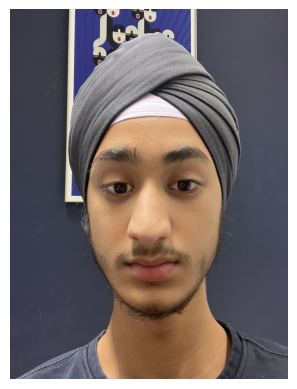

Prediction: Sober


In [3]:
predict_drunk_sober(clf, 'Raj.jpg')